Goal: Learn the fact that for-loop slows down matrix computation.

In [1]:
import numpy as np
import numpy.linalg as LA

AT = np.array([[1, 2], [3.0, 0.5], [3.5, 1.2], [4.0, 4.5]])
BT = np.array([[0.8, 1.3], [3.1, 3.8]])
D1=[]
for i in range(len(AT)):
    for j in range(len(BT)):
        D1.append(LA.norm(AT[i]-BT[j],ord=2)**2)    
D1=(np.array(D1)).reshape(4,2)

In [2]:
m=4
n=2
P_a = (LA.norm(AT,ord=2, axis=1)**2).reshape(m,1)
P_b = ((LA.norm(BT, ord=2, axis=1)**2).T).reshape(n,1)
D2=np.dot(P_a, np.ones([1,n]))+np.dot(np.ones([m,1]), P_b.T)-2*np.dot(AT, BT.T)
assert np.allclose( D1, D2 )

C:\Users\zhaoyiming\anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log10


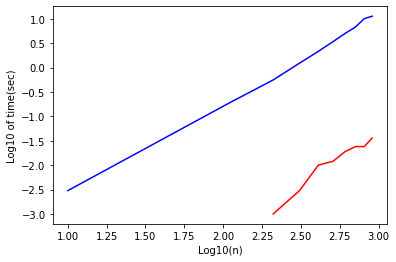

In [13]:
import time
import matplotlib.pyplot as plt


d=100
n=np.arange(10,1000,100)
D1_time=[]

for num in n:
    D1=[]
    A=np.random.rand(num, d)
    B=np.random.rand(num, d)
    #print(A.shape)
    t0=time.time()
    for i in range(num):
        for j in range(num):
            D1.append(LA.norm(A[i]-B[j],ord=2)**2)    
    D1=(np.array(D1)).reshape(num,num)
    t1=time.time()
    D1_time.append(t1-t0)
time_1=[np.log10(t) for t in D1_time]

D2_time=[]
for num in n:
    D2=[]
    A=np.random.rand(num, d)
    B=np.random.rand(num, d)
    t0=time.time()
    P_a = (LA.norm(A,ord=2, axis=1)**2).reshape(num,1)
    P_b = (LA.norm(B, ord=2, axis=1)**2).reshape(num,1)
    D2=np.dot(P_a, np.ones([1,num]))+np.dot(np.ones([num,1]), P_b.T)-2*np.dot(A, B.T)
    t1=time.time()
    D2_time.append(t1-t0)  
time_2=[np.log10(t) for t in D2_time]
numbers=[np.log10(num) for num in n]

plt.xlabel('Log10(n)')
plt.ylabel('Log10 of time(sec)')
plt.plot(numbers, time_1,  'b-')
plt.plot(numbers, time_2, 'r-')
plt.savefig('D_03.png')

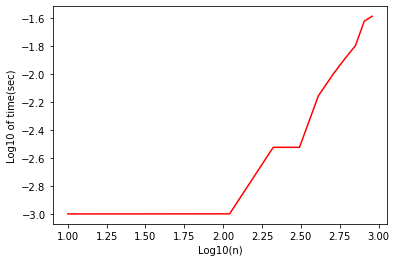

In [11]:
D2_time=[]
for num in n:
    D2=[]
    A=np.random.rand(num, d)
    B=np.random.rand(num, d)
    t0=time.time()
    P_a = (LA.norm(A,ord=2, axis=1)**2).reshape(num,1)
    P_b = (LA.norm(B, ord=2, axis=1)**2).reshape(num,1)
    D2=np.dot(P_a, np.ones([1,num]))+np.dot(np.ones([num,1]), P_b.T)-2*np.dot(A, B.T)
    t1=time.time()
    D2_time.append(t1-t0)  
time_1=[np.log10(t) for t in D1_time]
time_2=[np.log10(t) for t in D2_time]
numbers=[np.log10(num) for num in n]
#plt.ylim(-4, 1)
plt.xlabel('Log10(n)')
plt.ylabel('Log10 of time(sec)')
#plt.plot(numbers, time_1,  'b-')
plt.plot(numbers, time_2, 'r-')
plt.savefig('D_02.png')

In [82]:
A.shape

(290, 100)